In [10]:
#https://developers.google.com/codelabs/tensorflow-2-computervision#5
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist

2.4.1


In [11]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

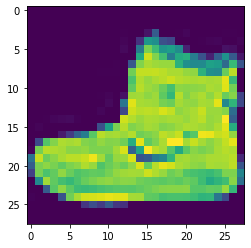

In [12]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [13]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [149]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [150]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6592 - accuracy: 0.7711
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3786 - accuracy: 0.8622
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3426 - accuracy: 0.8732
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.8837
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.8907
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.8942
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2693 - accuracy: 0.8996
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2574 - accuracy: 0.9049
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2460 - accuracy: 0.9082
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.243

In [16]:
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 2ms/step - loss: 0.3645 - accuracy: 0.8640


[0.3644550144672394, 0.8640000224113464]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 99.]
Coat
131.2
396.0549019607844
202.03921568627456
138.73333333333338
245.70588235294122
197.09411764705882
110.2392156862745
187.31764705882355
40.180392156862744
99.9686274509804
259.7960784313725
100.73725490196077
116.67450980392158
170.3019607843138
423.564705882353
149.1333333333333
210.22745098039215
296.5019607843137
247.27843137254902
328.9137254901962


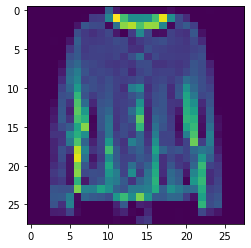

In [159]:
import numpy as np
classifications = model.predict(test_images)
print(np.floor(classifications[0]*100))
def what(x):
    label=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkelBoot']
    max_value = max(x)
    max_index = list(x).index(max_value)
    return label[max_index]

plt.imshow(test_images[25])
print(what(classifications[25]))
for i in range (20):
    print(sum(sum(test_images[i])))

This is the size of the Sample image: (474, 474, 3) 

sum= 153.40651655197144
This is the size of the Resized image: (28, 28, 3) 

This is the size of the Resized image: (28, 28) 

AnkelBoot
[1.0883784e-09, 1.2650757e-07, 4.0354693e-14, 2.8799374e-09, 3.690084e-17, 2.2345585e-05, 6.2187075e-07, 8.419763e-07, 0.3133855, 0.6865906]
T-shirt/top  :~ 0.0
Trouser  :~ 0.0
Pullover  :~ 0.0
Dress  :~ 0.0
Coat  :~ 0.0
Sandal  :~ 0.0
Shirt  :~ 0.0
Sneaker  :~ 0.0
Bag  :~ 31.0
AnkelBoot  :~ 68.0


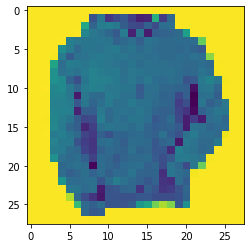

In [191]:
import numpy as np
def custom_image(img):
    image_open = open(img, 'rb')
    read_image = image_open.read()
    #plt.imshow(image_open)  
    image_decode = tf.image.decode_jpeg(read_image)
    print("This is the size of the Sample image:",image_decode.shape, "\n")
    #print("This is the array for Sample image:",image_decode)
    resize_image = tf.image.resize(image_decode, [28,28])
    resized=np.sum(resize_image,2)/(28*28*3)
    total=sum(sum(resized))
    print("sum=",total)
    print("This is the size of the Resized image:",resize_image.shape, "\n")
    print("This is the size of the Resized image:",resized.shape, "\n")
    plt.imshow(resized)
    classify=model.predict(np.array([resized]))
    print(what(classify[0]))
    prob=list(classify[0])
    print(prob)
    for lab in range (len(label)):
        print(label[lab],' :~',np.floor(prob[lab]*100))
#custom_image('dress.jpg')
#custom_image('coat.png')
#custom_image('ppsomya.jpg')
custom_image('pullover.jpg')

<Figure size 432x288 with 0 Axes>

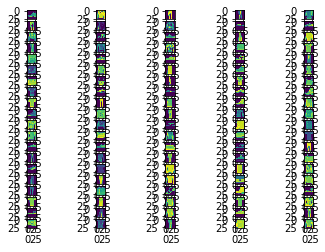

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure()
a=20
b=5
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(a,b) 
k=0
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range (a):
    for j in range(b):
        axarr[i][j].imshow(test_images[k])
        k+=1

In [40]:
label=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkelBoot']

In [97]:
print(test_images[0].shape)

(28, 28)
